# Monte Carlo Methods
                                                                                                        CI-B 2023
                                                                                                        Alexander, Lea, Filip        .

                                                                                                        

## Hello World: Monte Carlo Edition
### Estimating $\pi$


* $x,y \sim \mathcal{U_{[-1,1]}}.$
* Area of the square: $A_\square=4$
* Area of the circle: $A_O = \pi$
    * Is the sampled point inside of the the circle ($x^2 + y^2 < 1$)? 

Random Variable $X(\omega)$ = 1 .... point $x,y$ inside of circle, $X(\omega)$ = 0 otherwise

$P(X) = \frac{A_O}{A_\square} = \frac{\pi}{4}$



In [6]:
# imports for the notebook
import matplotlib.pyplot as plt
from ipywidgets import *
import numpy as np
plt.style.use("seaborn-v0_8-darkgrid")

%matplotlib widget


interactive(children=(IntSlider(value=1, description='n', max=10000, min=1), Output()), _dom_classes=('widget-…

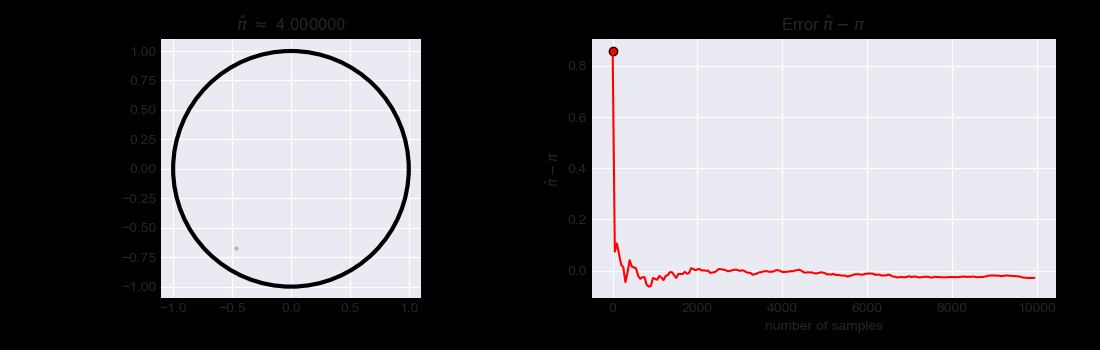

In [7]:
# Estimating Pi Example

def estimate_pi():
    num_samples = 10000
    x = np.random.uniform(low=-1, high=1, size=num_samples)
    y = np.random.uniform(low=-1, high=1, size=num_samples)
    c = x**2 + y**2 < 1

    fig, axes = plt.subplots(1, 2, figsize=(11,3.5))
    ax = axes[0]; er = axes[1]; fig.tight_layout(pad=2.5)
    er.set_xlim(0, num_samples)


    circle = plt.Circle((0, 0), 1, color='k',fill=False, linewidth=3)
    pi_t = [4*((sum(c[:i])/i))-np.pi for i in range(1,num_samples, 50)]

    @widgets.interact(n=(1, num_samples, 1))
    def update(n = 1):
        ax.clear(); ax.set_aspect('equal');
        er.clear(); er.grid('on'); 
        ax.scatter(x[:n], y[:n], c=c[:n], alpha=0.2, s=5, cmap='coolwarm_r')
        pi_hat = 4*((sum(c[:n])/n))
        ax.add_patch(circle)

        er.plot(range(1,num_samples, 50), pi_t, '-r')
        er.scatter(n, pi_hat-np.pi, c='red', edgecolors='k')


        ax.set_title(r"$\hat{\pi}$ $\approx$ " + f"{pi_hat:.6f}")
        er.set_title(r"Error $\hat{\pi}-\pi$")
        er.set_xlabel("number of samples"); er.set_ylabel(r"$\hat{\pi}-\pi$")

estimate_pi()


# Sample from a distribution

## Rejection Sampling 

pretty cool how we can actually draw from different distr.
basic idea: 
* take distr that we know how to draw from
* scale it over the Distr we want to sample from
* Reject samples that are above D(x)



interactive(children=(IntSlider(value=200, description='n_samples', max=100000, min=1, step=5), IntSlider(valu…

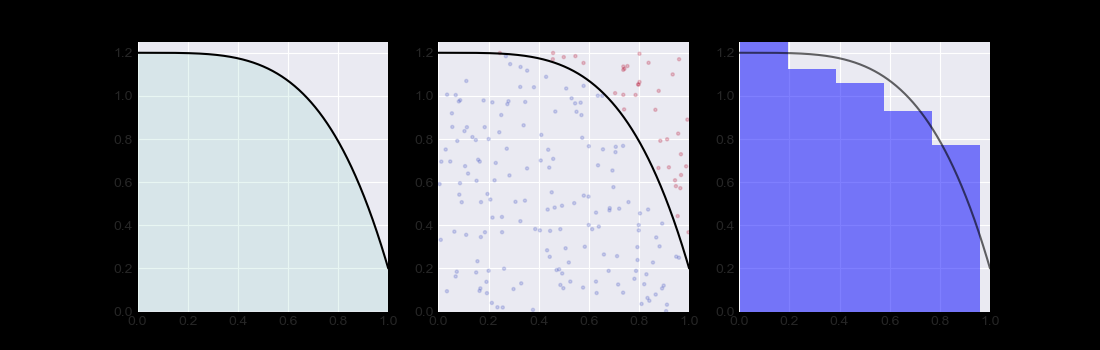

In [8]:
# Rejection sampling
# of y = 1.2 - x**4  [ -> integral_0^1 (1.2 - x**4 )dx = 1]
def rejection_sampling():
    def f(x):
        return 1.2 - x**4 # integral_0^1 (1.2 - x**4 )dx = 1

    xs = np.linspace(0, 1, 1000)
    ys = f(xs)
    fig, reject_ax = plt.subplots(1,3, figsize=(11, 3.5))

    reject_ax[0].plot(xs, ys, label="Forward Function", c='k') 
    reject_ax[0].fill_between(xs, ys, 0, alpha=0.2)
    reject_ax[0].set_xlim([0, 1]), reject_ax[0].set_ylim([0, 1.25])
    n_max_samples = 100000
    x_all = np.random.uniform(low=0, high=1,    size=n_max_samples)
    y_all = np.random.uniform(low=0, high=1.2, size=n_max_samples)

    @widgets.interact(n_samples=(1, n_max_samples, 5), nbins=(1,50,1))
    def update(n_samples = 200, nbins=5):
        x = x_all[:n_samples]
        y = y_all[:n_samples]
        reject_ax[1].clear(); reject_ax[2].clear()

        c = y<f(x)

        reject_ax[1].plot(xs, ys, c='k')
        reject_ax[1].scatter(x, y, alpha=0.2, label="Samples", c=c, cmap='coolwarm_r', s=5)
        reject_ax[1].set_xlim([0, 1]), reject_ax[1].set_ylim([0, 1.25]),

        reject_ax[2].plot(xs, ys, c='k', alpha=0.6)
        reject_ax[2].hist(x[c], bins=nbins, density=True, alpha=0.5, label="Rejection Sampled", color='blue')
        reject_ax[2].set_xlim([0, 1]), reject_ax[2].set_ylim([0, 1.25])

rejection_sampling()

## From Uniform to Normal

$\mathcal{U_{[0,1]}}  \rightarrow \mathcal{N}(\mu,\,\sigma^{2})$ ?

interactive(children=(IntSlider(value=500, description='n_samples', max=100000, min=1, step=5), IntSlider(valu…

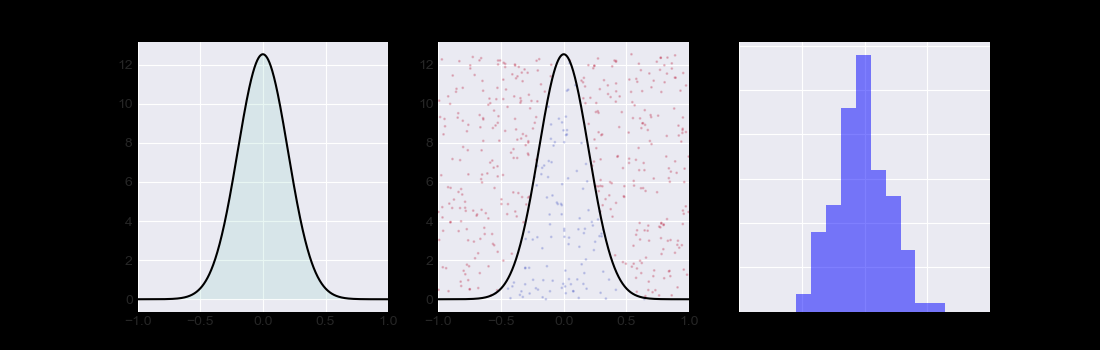

In [21]:
# Rejection sampling to a Gaussian
def rejection_sampling_gauss():
    def f(x, mean=0, sigma=0.1):
        # return (np.pi*sigma) * np.exp(-0.5*((x-mean)/sigma)**2)
        return 1/sigma*np.sqrt(2*np.pi) * np.exp(-0.5*((x-mean)/sigma)**2)

    fig, reject_gauss_ax = plt.subplots(1,3,  figsize=(11, 3.5))

    # reject_gauss_ax[0].set_xlim([0, 1]), reject_gauss_ax[0].set_ylim([0, 1.25])
    n_max_samples = 100000
    x_all = np.random.uniform(low=-1, high=1,size=n_max_samples)
    y_all = np.random.uniform(low=0, high=1, size=n_max_samples)

    @widgets.interact(n_samples=(1, n_max_samples, 5), nbins=(1,50,1), sigma=(0.2, 1, 0.01), mean=(-1, 1, 0.01))
    def update(n_samples = 500, nbins=10, sigma=0.2, mean=0):
        xs = np.linspace(-1, 1, 1000)
        ys = f(xs, mean, sigma)

        x = x_all[:n_samples]
        y = y_all[:n_samples]*ys.max() # y_all is 0-1, so scale it to the max of the gaussian (*1.1 to make it a bit bigger)
        reject_gauss_ax[0].clear(); reject_gauss_ax[1].clear(); reject_gauss_ax[2].clear()
        c = y<f(x, mean, sigma)

        reject_gauss_ax[0].plot(xs, ys, label="Forward Function", c='k') 
        reject_gauss_ax[0].fill_between(xs, ys, 0, alpha=0.2)
        reject_gauss_ax[0].set_xlim([-1, 1]), 

        reject_gauss_ax[1].plot(xs, ys, c='k')
        reject_gauss_ax[1].scatter(x, y, alpha=0.2, label="Samples", c=c, cmap='coolwarm_r', s=1)
        reject_gauss_ax[1].set_xlim([-1, 1]),

        reject_gauss_ax[2].tick_params(axis='both', which='both', bottom=False, top=False, labelbottom=False, right=False, left=False, labelleft=False)

        reject_gauss_ax[2].hist(x[c], bins=nbins, density=False, alpha=0.5, label="Rejection Sampled", color='blue')
        reject_gauss_ax[2].set_xlim([-1, 1]),

rejection_sampling_gauss()

## Importance Sampling

## Expected Value

$$
\bar{X} = E(X) = \sum_{s \in S} p(s)X(s)\\
\text{"What are we going to get on average?"}\\
$$


## Variance


$$
Var[X] = E[(X - \bar{X})^2]\\
\text{"How tightly clustered will my results be?"}\\
$$





show S f(x) * p(x)/q(x) * q(x) <---- tractable since we can choose q(x)

## Inversion Sampling
